# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business objective of this study is the identification of the most importants features that make a car more or less expensive. This will provide the used car dealership owner with key information to increase its sales. 

Resources available to work on this project are: 1) Data Scientist in training, 2) softwate and hardware: Lenovo Laptop and  python notebook and 3) Data containing information on 3 million used cars.
Risk: The principal risk from this analysis is the amount of missing information for some features could have an impact on the resulting recommendation.

Data mining goals is predicting factors that makes a car more or less expensive. Identifying the factors that impacts the car price

The Steps for this project: 1) Define Business objective 2) Data Understanding 3) Preprare the data for the study 4) build the prediction model and identify the critical features 5) assess the model recommendations 6) provide the results to the customer 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import set_config
set_config(display="diagram")
import warnings


The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure get familiar with the data.

In [9]:
data = pd.read_csv('C:\\Users\\willi\\OneDrive\\AI ML\\vehicles1.csv')
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
Most of the features are qualitative data, next steps are separate feature into ordinal or nominal data.

In [4]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Data contains zero for price cars, the zero will be remove as that is not a considerable real situation to this model

In [4]:
unique_values_region = data['region'].unique()
unique_values_region
# feature contains many different values this feature to be removed because it will impact the analysis and recommendations.The state will serve as good similar feature to replace this knowledge

array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham',
       'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
       'dothan', 'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara',

In [84]:
unique_values_manufacturer = data['manufacturer'].unique()
unique_values_manufacturer
# nominal feature

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [85]:
unique_values_model = data['model'].unique()
#unique_values_model
distinct_count = data['model'].nunique()
distinct_count
# nominal data with more than 29k values , it will be removed from the model as the manufacturer and size is a good indicator of price

29649

In [87]:
unique_values_size = data['size'].unique()
unique_values_size
#nominal size is just an attribute without increasing preference

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [88]:
unique_values_condition = data['condition'].unique()
unique_values_condition
#ordinal the higher the better the condition- salvage , fair,  good, excellent, like new, new

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [62]:
unique_values_condition = data['cylinders'].unique()
unique_values_condition

array(['4 cylinders', '6 cylinders', '8 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [15]:
unique_values_fuel = data['fuel'].unique()
unique_values_fuel
# nominal fuel is just an attribute withour increasing preference

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [16]:
unique_values_VIN = data['VIN'].unique()
unique_values_VIN
# VIN is a unique identifier for the vehicle to be dropped 

array([nan, '3GTP1VEC4EG551563', '1GCSCSE06AZ123805', ...,
       '2HGES15535H620534', '1FDWF37P64EA24868', 'SAJGX2749VCOO8376'],
      dtype=object)

In [17]:
unique_values_state = data['state'].unique()
unique_values_state
# nominal state is just an attribute withour increasing preference

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [18]:
unique_values_title_status = data['title_status'].unique()
unique_values_title_status
# ordinal the higher the better the condition 1. parts only, 2. missing, 3. salvage, 4. rebuilt, 5, lien, 6 clean

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [19]:
unique_values_transmission = data['transmission'].unique()
unique_values_transmission
# nominal transmission is just an attribute without increasing preference

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [20]:
unique_values_paint_color = data['paint_color'].unique()
unique_values_paint_color
# nominal paint_type is just an attribute without increasing preference

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [21]:
unique_values_type = data['type'].unique()
unique_values_type
# nominal type is just an attribute without increasing preference

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [63]:
unique_values_type = data['drive'].unique()
unique_values_type
# nominal type is just an attribute without increasing preference

array(['fwd', 'rwd', '4wd'], dtype=object)

About the data quality, it is observed a significant number of records with the missing data , like the car size.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

column size contains a significant amount of records with null values however this column is very important for separate the type of cars

Drop the Null values from the data, the no value records will be removed as no good replacement strategy would fit to this table.

In [10]:
#2. drop null values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2)

In [12]:
#3 remove the zero on price
data = data[data['price'] != 0]
data.describe()

,id,price,year,odometer
count,3.249600e+04,32496.000000,32496.000000,3.249600e+04
mean,7.311551e+09,16993.479013,2010.938269,1.089832e+05
std,4.294195e+06,13219.394890,7.274987,1.022710e+05
min,7.301592e+09,1.000000,1905.000000,0.000000e+00
25%,7.308238e+09,7500.000000,2008.000000,6.744975e+04
50%,7.312411e+09,13125.500000,2012.000000,1.055840e+05
75%,7.315154e+09,23395.000000,2015.000000,1.428455e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


In [13]:
#4 drop columns 'VIN', 'model', 'id', 'region'
# VIn, Model and region justication included in the previous analysis of the column and id is removed because it just a record identifier
df1 = data.drop(['VIN', 'model', 'id', 'region'], axis=1)

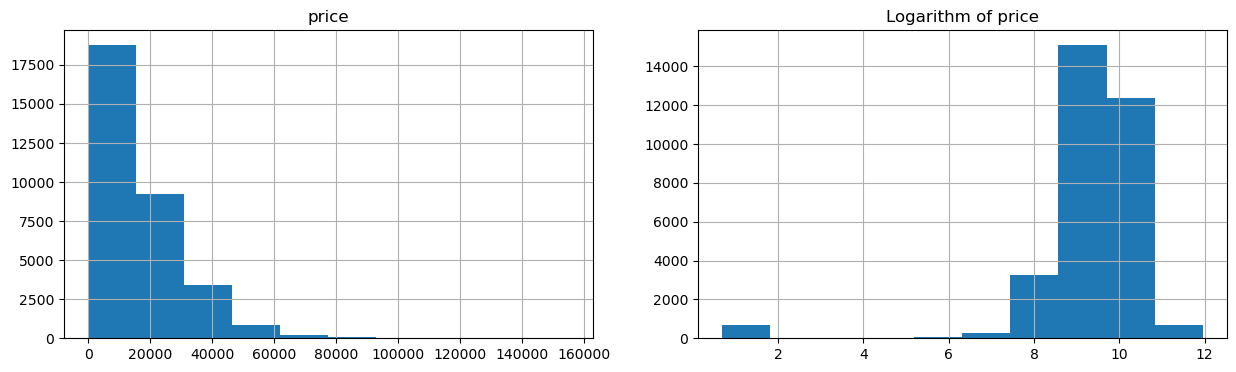

In [14]:
# Prices requires a log transformation 
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(df1['price'])
ax[0].grid()
ax[0].set_title('price')
ax[1].hist(np.log1p(df1['price']))
ax[1].grid()
ax[1].set_title('Logarithm of price');

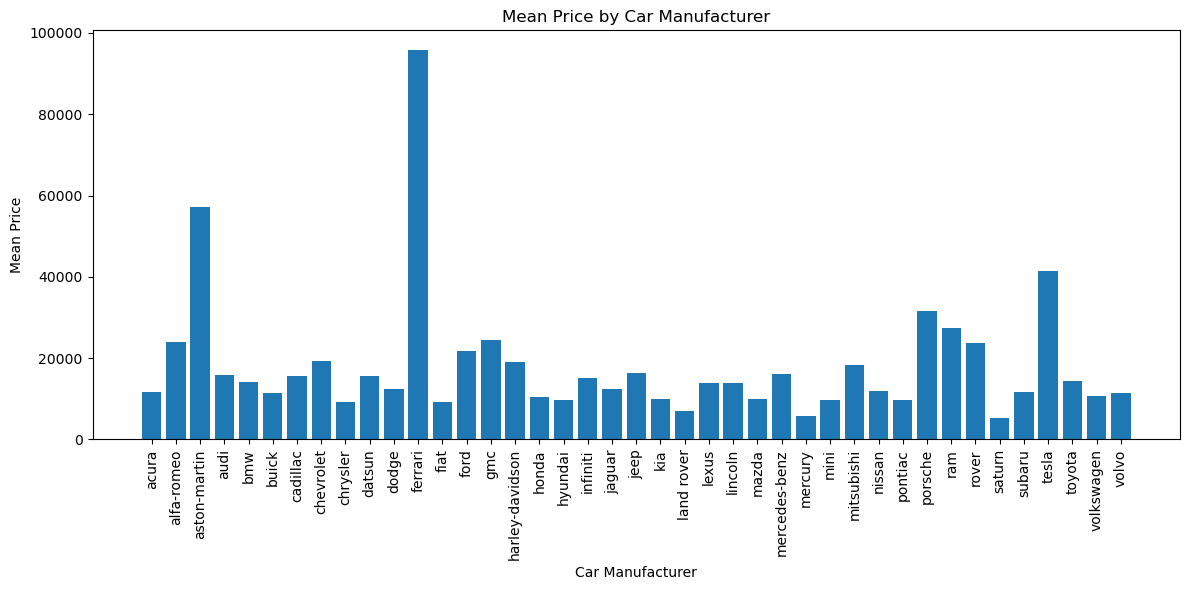

In [15]:
# Group the data by 'manufacturer' and calculate the mean price for each model
model_price_mean = df1.groupby('manufacturer')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['manufacturer'], model_price_mean['price'])
plt.xlabel('Car Manufacturer')
plt.ylabel('Mean Price')
plt.title('Mean Price by Car Manufacturer')
plt.xticks(rotation=90)  
plt.tight_layout()

# Show the chart
plt.show()

As expected some manufacturer will have a signficant impact on price, 'ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo' are recommended to be removed from the analysis due to their higher price. 

Manufacurer 'ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo' are included in the final report as feature that have a positive impact on price.


As expected some manufacturer will have a signficant impact on price, 'ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo' and prosche are recommended to be removed from the analysis due to their higher price.

Manufacurer 'ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo' and porsche are included in the final report as feature that have a positive impact on price.


In [16]:
# 4 Filter out rows where 'manufacturer' is not equal ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo, porsche
df1 = df1[~df1['manufacturer'].isin(['ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo', 'porsche'])]

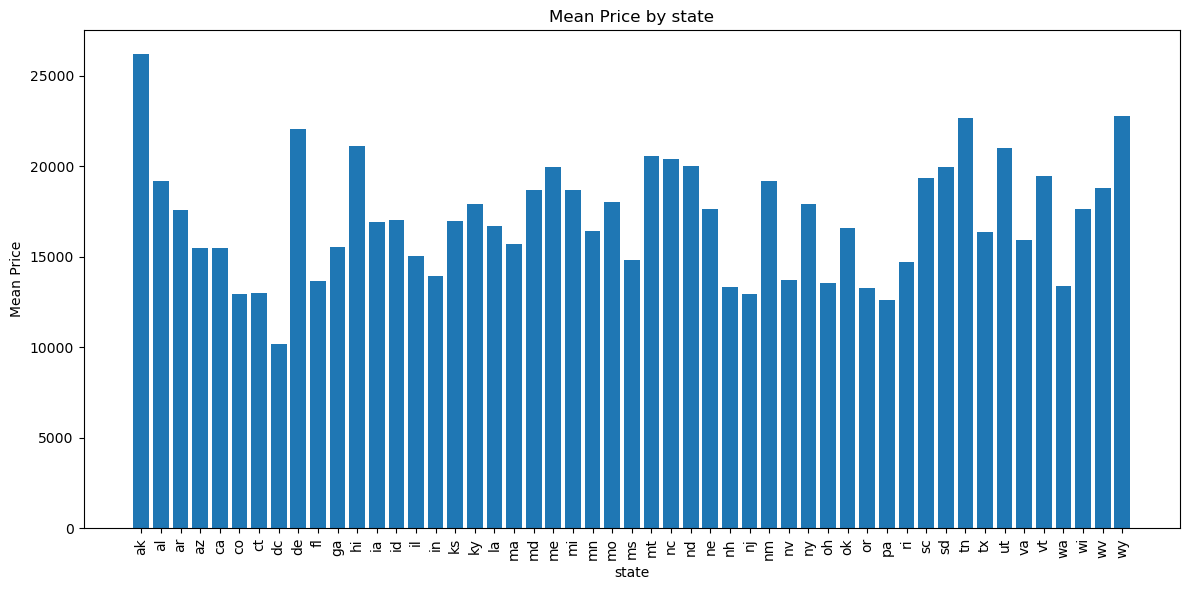

In [17]:
# Group the data by 'state' and calculate the mean price for each model
model_price_mean = df1.groupby('state')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['state'], model_price_mean['price'])
plt.xlabel('state')
plt.ylabel('Mean Price')
plt.title('Mean Price by state')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the chart
plt.show()

Based on the plots some states will have a significant impact on the price:

Higher price states from the data: ak, de, hi, tn and wy
lower price state from the data: dc

Those states will be removed from the data and recommended in the final recommendation.

In [18]:
# 5 Filter out rows where 'state' 
df1 = df1[~df1['state'].isin(['ak', 'dc', 'wy', 'tn', 'de', 'hi'])]

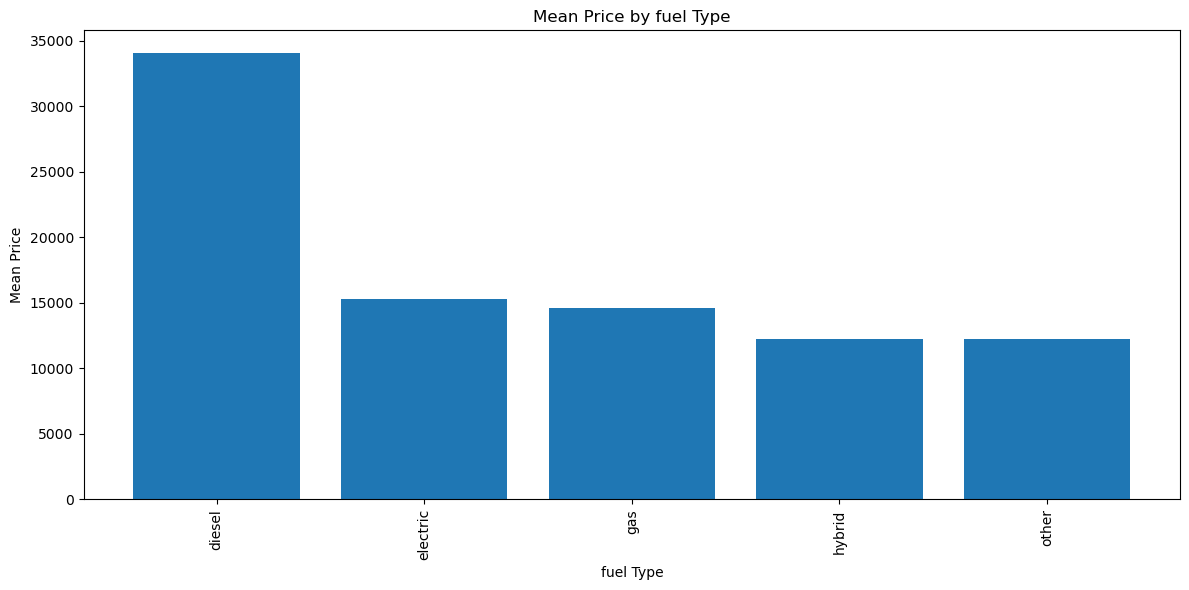

In [19]:
# Group the data by 'type' and calculate the mean price for each model
model_price_mean = df1.groupby('fuel')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['fuel'], model_price_mean['price'])
plt.xlabel('fuel Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by fuel Type')
plt.xticks(rotation=90) 
plt.tight_layout()

# Show the chart
plt.show()

Fuel type can be reduced to diese and other because of similar values.

In [20]:
#6 combine fuel
df1['new_fuel'] = df1['fuel'].replace(['gas', 'other', 'hybrid', 'electric'], 'other')


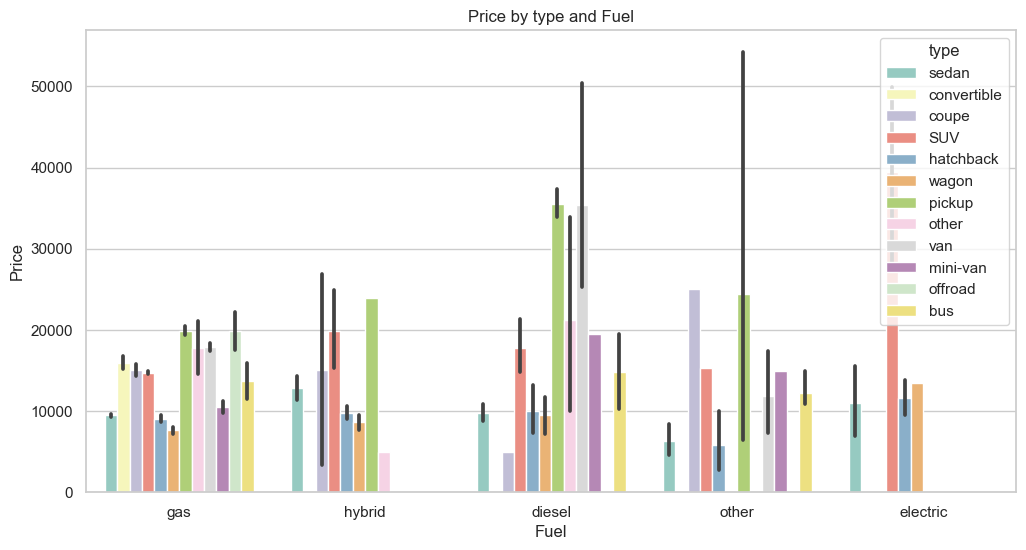

In [58]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="fuel", y="price", hue="type", data=df1, palette="Set3")
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.title("Price by type and Fuel")
plt.legend(title="type", loc="upper right")

# Show the chart
plt.show()

Diesel vehicles corresponds to many vehicle types.

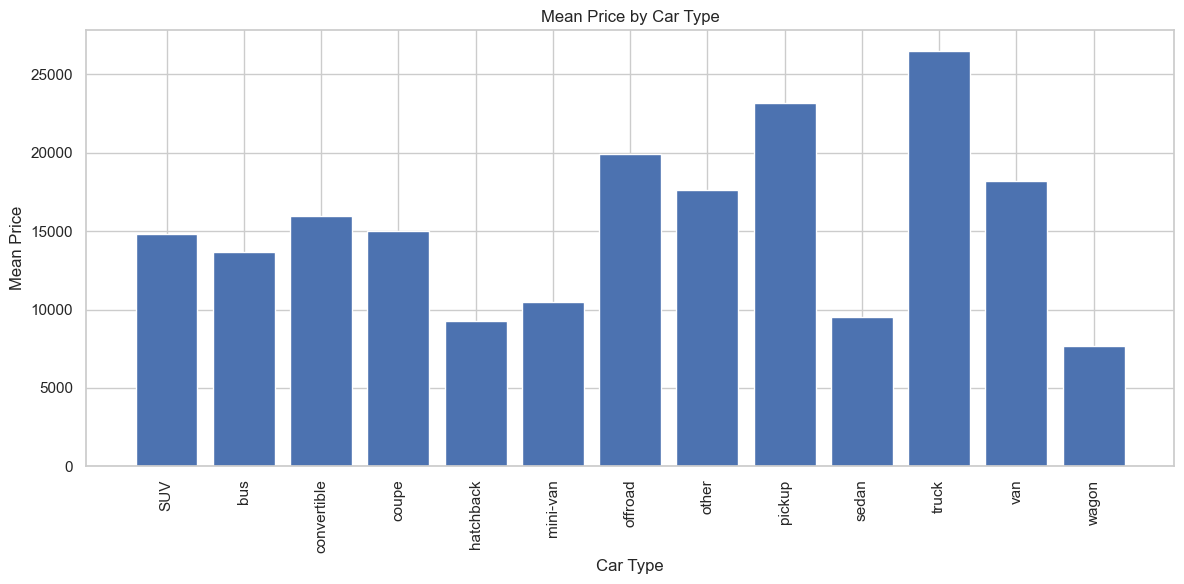

In [22]:
# Group the data by 'type' and calculate the mean price for each model
model_price_mean = df1.groupby('type')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['type'], model_price_mean['price'])
plt.xlabel('Car Type')
plt.ylabel('Mean Price')
plt.title('Mean Price by Car Type')
plt.xticks(rotation=90) 
plt.tight_layout()

# Show the chart
plt.show()

In [27]:
# remove truck type as its price is very different from the other types - Truck will be recommended as having a positive immpact on price
df1 = df1[df1['type'] != 'truck']
unique_values_type2 = df1['type'].unique()
unique_values_type2

array(['sedan', 'convertible', 'coupe', 'SUV', 'hatchback', 'wagon',
       'pickup', 'other', 'van', 'mini-van', 'offroad', 'bus'],
      dtype=object)

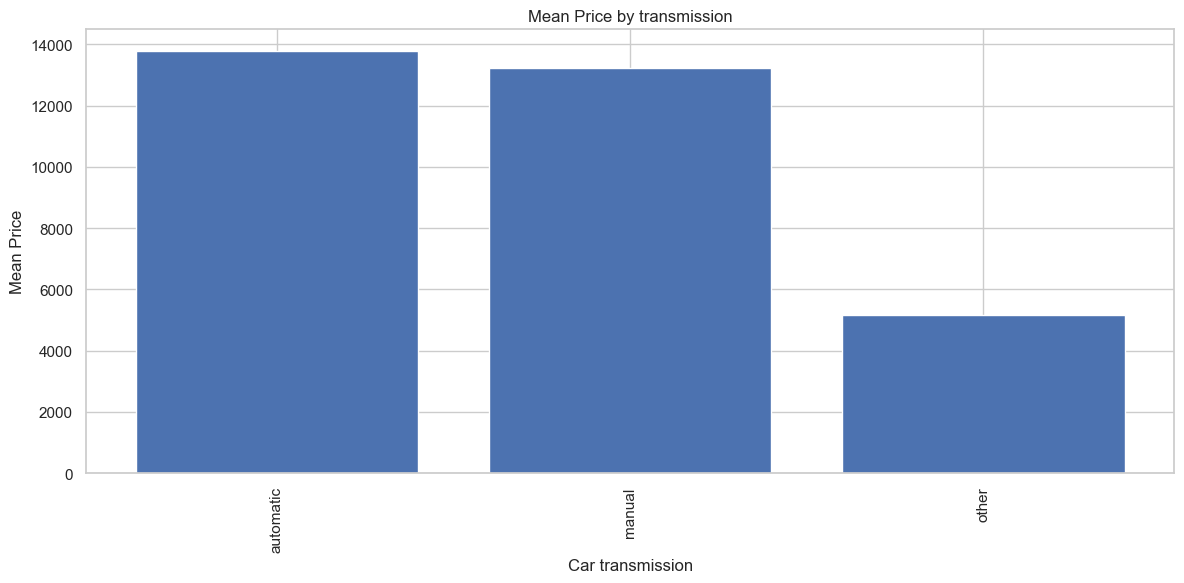

In [28]:
# Group the data by 'model' and calculate the mean price for each model
model_price_mean = df1.groupby('transmission')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['transmission'], model_price_mean['price'])
plt.xlabel('Car transmission')
plt.ylabel('Mean Price')
plt.title('Mean Price by transmission')
plt.xticks(rotation=90)  
plt.tight_layout()

# Show the chart
plt.show()

In [29]:
#7 Combine automatic and manual as their results are similar but very different than other transmission
df1['new_transmission'] = df1['transmission'].replace(['automatic', 'manual'], 'Auto-Man')
df1

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,new_fuel,new_transmission
215,4000,2002.0,toyota,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,other,Auto-Man
219,2500,1995.0,bmw,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,other,Auto-Man
268,9000,2008.0,mazda,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al,other,Auto-Man
338,4000,1972.0,mercedes-benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al,other,Auto-Man
355,9400,2008.0,mercedes-benz,good,6 cylinders,gas,129473.0,clean,automatic,rwd,full-size,sedan,silver,al,other,Auto-Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426169,5495,2009.0,mercury,good,4 cylinders,gas,138765.0,clean,automatic,4wd,mid-size,SUV,black,wi,other,Auto-Man
426173,5995,2009.0,buick,good,6 cylinders,gas,168432.0,clean,automatic,fwd,full-size,sedan,red,wi,other,Auto-Man
426181,15995,2014.0,mercedes-benz,good,6 cylinders,gas,116431.0,clean,automatic,4wd,mid-size,sedan,black,wi,other,Auto-Man
426187,4295,2007.0,dodge,good,6 cylinders,gas,206546.0,clean,automatic,4wd,mid-size,SUV,black,wi,other,Auto-Man


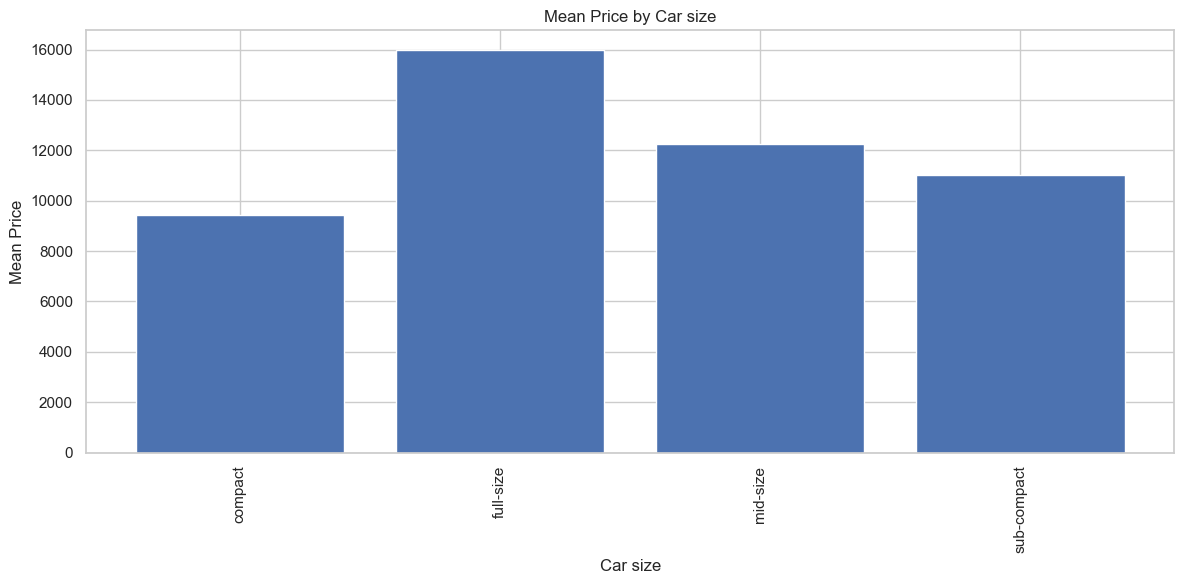

In [30]:
# Group the data by 'size' and calculate the mean price for each model
model_price_mean = df1.groupby('size')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['size'], model_price_mean['price'])
plt.xlabel('Car size')
plt.ylabel('Mean Price')
plt.title('Mean Price by Car size')
plt.xticks(rotation=90)  # 
plt.tight_layout()

# Show the chart
plt.show()

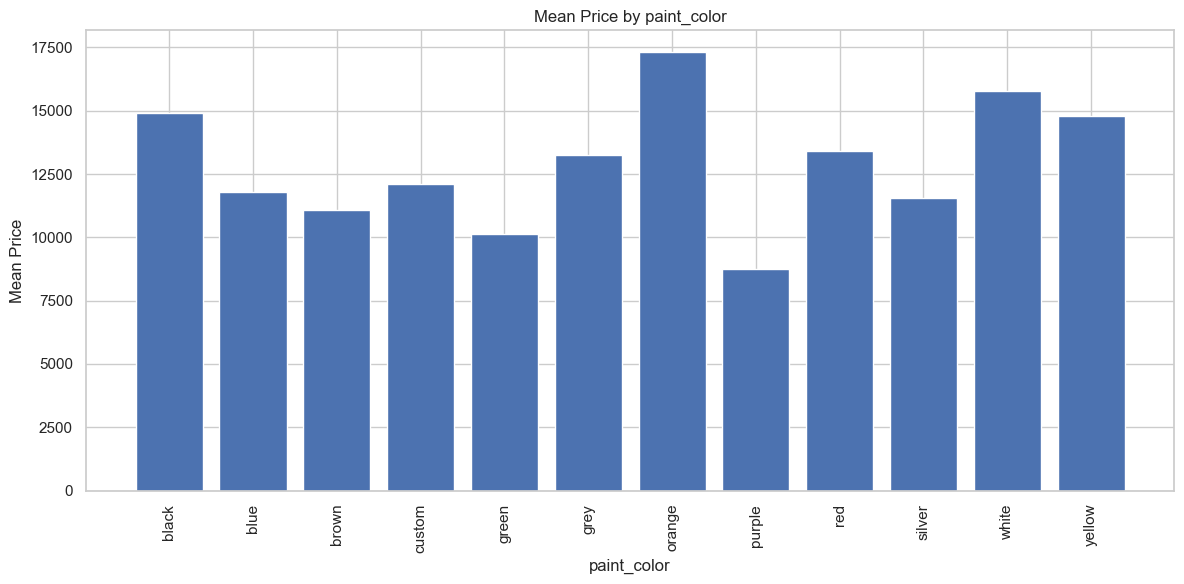

In [31]:
# Group the data by 'size' and calculate the mean price for each model
model_price_mean = df1.groupby('paint_color')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_price_mean['paint_color'], model_price_mean['price'])
plt.xlabel('paint_color')
plt.ylabel('Mean Price')
plt.title('Mean Price by paint_color')
plt.xticks(rotation=90)  # 
plt.tight_layout()

# Show the chart
plt.show()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29862 entries, 126 to 426833
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             29862 non-null  int64  
 1   year              29862 non-null  float64
 2   manufacturer      29862 non-null  object 
 3   condition         29862 non-null  object 
 4   cylinders         29862 non-null  object 
 5   fuel              29862 non-null  object 
 6   odometer          29862 non-null  float64
 7   title_status      29862 non-null  object 
 8   transmission      29862 non-null  object 
 9   drive             29862 non-null  object 
 10  size              29862 non-null  object 
 11  type              29862 non-null  object 
 12  paint_color       29862 non-null  object 
 13  state             29862 non-null  object 
 14  new_transmission  29862 non-null  object 
 15  new_fuel          29862 non-null  object 
dtypes: float64(2), int64(1), object(13)
m

Based on the impact on the carsize Analysis will be split into 3 different groups, compact, combined mid size-subcompact and full size.


In [32]:
# 8 split analysis by size because this is how regulary people see the vehicles and it is good way to group the data
df_com = df1[df1['size'] == 'compact']
df_mid = df1[df1['size'].isin(['sub-compact', 'mid-size'])]
df_full = df1[df1['size'] == 'full-size']


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

For model selection the MSE train and MSE test will be used to select the best model and the features, in addition to the evaluation of the results that make sense in regards to the data.The MSE metrics is used based on the reduction of the prediction error of the model in this case this is not prediction model but an understanding of the historical data

SIZE COMPACT CARS

In [61]:
# model by size
# split x and y
# fuel and transmission replace by new fuel and new transmission
# Model for Compact Cars
# use the log transformation on price
# converting to Ordinal title status and conditions 

warnings.filterwarnings("ignore", category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(
    df_com.drop(['price', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_com['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']), 
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state', 'paint_color']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
  ],
    remainder='passthrough'
)

# Create a pipeline with the transformer and a LinearRegression model
pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('regressor', LinearRegression())
])
pipe.fit(X_train, y_train)

# Transform both training and testing data using the fitted preprocessor
X_train_transformed = pipe.named_steps['preprocessor'].transform(X_train)
X_test_transformed = pipe.named_steps['preprocessor'].transform(X_test)

# Create DataFrames for the transformed data
columns = vehicle_oc_transformer.get_feature_names_out()
df_train_transformed = pd.DataFrame(X_train_transformed, columns=columns, index=X_train.index)
df_test_transformed = pd.DataFrame(X_test_transformed, columns=columns, index=X_test.index)

# Add the log-transformed target variable to the DataFrames
df_train_transformed['log_price'] = y_train
df_test_transformed['log_price'] = y_test

# Compute the correlation coefficients
correlation_train = df_train_transformed.corr()
correlation_test = df_test_transformed.corr()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print or analyze the correlation coefficients
print("Correlation Matrix (Training Data):")
print(correlation_train['log_price'].sort_values(ascending=False))

print("\nCorrelation Matrix (Testing Data):")
print(correlation_test['log_price'].sort_values(ascending=False))

Correlation Matrix (Training Data):
log_price                          1.000000
cat__cylinders_4 cylinders         0.455798
cat__drive_fwd                     0.341642
cat__type_SUV                      0.183379
num__odometer                      0.129987
cat__type_hatchback                0.121399
cat__state_ca                      0.115526
cat__type_coupe                    0.113584
cat__manufacturer_chevrolet        0.111963
cat__manufacturer_toyota           0.111754
cat__state_or                      0.102984
cat__type_convertible              0.096900
cat__manufacturer_ford             0.096893
cat__paint_color_red               0.093961
cat__state_ny                      0.091599
cat__manufacturer_honda            0.087151
cat__drive_rwd                     0.076537
cat__state_tx                      0.072581
cat__manufacturer_volkswagen       0.069417
cat__state_mi                      0.066450
cat__manufacturer_subaru           0.065765
cat__state_ia                      0.064

Based on the correlation analysis paint_color can be removed from the analysis

Linear Regression

In [45]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions 
# Model for compact cars 

X_train, X_test, y_train, y_test = train_test_split(
    df_com.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_com['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),  # 'paint_color' removed
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
        ('poly', PolynomialFeatures(include_bias=False, interaction_only=True), ['odometer', 'year'])
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = pipe.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = pipe.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

# Get feature names after preprocessing
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the LinearRegression model
coefficients = pipe.named_steps['regressor'].coef_

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sequential Feature Selector
sfs = SequentialFeatureSelector(pipe.named_steps['regressor'], n_features_to_select=10, direction='forward')
sfs.fit(X_train_transformed, y_train)

selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_coefficients = [coefficients[i] for i in selected_feature_indices]

selected_coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': selected_coefficients})

selected_coef_df = selected_coef_df.reindex(selected_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Selected Features:")
print(selected_coef_df)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Selected Features:
                      Feature  Coefficient
6             cat__type_wagon    -1.481572
0     cat__manufacturer_acura    -0.789307
2  cat__cylinders_4 cylinders     0.693485
5              cat__drive_rwd     0.367057
3  cat__cylinders_6 cylinders     0.360232
8               cat__state_ia     0.235330
7               cat__state_ar     0.176383
1      cat__manufacturer_ford     0.031966
4              cat__drive_fwd     0.000886
9                  poly__year    -0.000844
MSE (Train): 1.4656450724126913
MSE (Test): 1.4710815090277851


Top 10 features on compact cars :
-type wagon has a negative impact on price
-manufacturer acura has a negative impact on price
-manufacturer ford has a positive impact on price
-cylinder 4 or 6 cylinder vehicle positive impact  on prices
-drive rwd has positive impact on price
-state ia and ar have a positive impact on price


GridSearchCV

In [43]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# Model for Compact Cars
# use the log transformation on price
# converting to Ordinal title status and conditions 

warnings.filterwarnings("ignore", category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(
    df_com.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_com['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']), 
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    ],
    remainder='passthrough'
)

# Define the alpha values to search for
alphas = [0.1, 1, 10, 100, 1000]

# Create a parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': alphas
}

# Create a Ridge regression pipeline
ridge_pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('ridge', Ridge())
])

# Create GridSearchCV object
grid_2 = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV on the training data
grid_2.fit(X_train, y_train)

# Get the best estimator and display the results
best_estimator = grid_2.best_estimator_
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Best Alpha:", grid_2.best_params_['ridge__alpha'])
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Alpha: 10
MSE (Train): 1.5044293847326613
MSE (Test): 1.4139159015133458


RIDGE 

In [35]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions 
# compact cars Ridge - alpha = 10 from GridSearch

warnings.filterwarnings("ignore", category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(
    df_com.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_com['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']),  
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
        
    ],
    remainder='passthrough'
)

# Create a Ridge regression pipeline without an intercept
ridge_pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('ridge', Ridge(alpha=10, fit_intercept=False))
])
# Fit the pipeline on the training data
ridge_pipe.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = ridge_pipe.predict(X_train)
y_test_pred = ridge_pipe.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Get feature names after preprocessing from the ColumnTransformer
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the Ridge regression model
coefficients = ridge_pipe.named_steps['ridge'].coef_

# The number of feature names and coefficients should match now
feature_names_length = len(feature_names)
coefficients_length = len(coefficients)

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients from biggest to smallest
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Select the top 10 features
top_10_features = coef_df.head(10)

# Display the selected features and their coefficients
print(top_10_features)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

                        Feature  Coefficient
42  cat__new_transmission_other    -3.482052
34  cat__cylinders_10 cylinders    -2.469715
41          cat__new_fuel_other     2.177969
45               cat__drive_rwd     1.903151
36   cat__cylinders_4 cylinders     1.649928
44               cat__drive_fwd     1.555822
63                cat__state_fl    -1.548581
40         cat__cylinders_other     1.352495
38   cat__cylinders_6 cylinders     1.280129
43               cat__drive_4wd     1.101613
MSE (Train): 1.5751367725136802
MSE (Test): 1.5268829224031786


Top 10 features for compact cars Rigde model:
-cylinder 10 cylinders negative impact on price
-cylinder 6 and 4 and other have positive impact on price
-Fuel - non diesel has positive impact on price
-transmission no manual or no automatic has a negative impact on price
-drive rwd, fwd and 4wd has positive impact on price
-state:fl has negative impact on price

Lasso

In [49]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions 
# compact cars lasso model

warnings.filterwarnings("ignore", category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(
    df_com.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_com['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']),
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('regressor', Lasso(alpha=10)) 
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = pipe.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = pipe.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

# Get feature names after preprocessing
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the Lasso model
coefficients = pipe.named_steps['regressor'].coef_

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sequential Feature Selector
sfs = SequentialFeatureSelector(pipe.named_steps['regressor'], n_features_to_select=10, direction='forward')
sfs.fit(X_train_transformed, y_train)

selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_coefficients = [coefficients[i] for i in selected_feature_indices]

selected_coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': selected_coefficients})

selected_coef_df = selected_coef_df.reindex(selected_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Selected Features:")
print(selected_coef_df)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Selected Features:
                       Feature  Coefficient
0                num__odometer          0.0
1                    num__year         -0.0
2      cat__manufacturer_acura         -0.0
3       cat__manufacturer_audi         -0.0
4        cat__manufacturer_bmw         -0.0
5      cat__manufacturer_buick          0.0
6   cat__manufacturer_cadillac          0.0
7  cat__manufacturer_chevrolet          0.0
8   cat__manufacturer_chrysler         -0.0
9     cat__manufacturer_datsun          0.0
MSE (Train): 7.498098751499777
MSE (Test): 7.775487696768096


Lasso does not provide better results as MSE is considerable higher than other models

Based on MSE results for Compact cars the best model is the linear regression 

MID Size Models

Linear Regression

In [50]:
# midsize car
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions


X_trainMid, X_testMid, y_trainMid, y_testMid = train_test_split(
    df_mid.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_mid['price']), 
    random_state=42,
    test_size=0.3
)

# Create a ColumnTransformer with StandardScaler() for numerical features
# Transform Ordinal and Categorical features

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),  # 'paint_color' removed
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
        ('poly', PolynomialFeatures(include_bias=False, interaction_only=True), ['odometer', 'year'])
    ],
    remainder='passthrough'
)

# Create a pipeline with the transformer and a LinearRegression model
pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_trainMid, y_trainMid)

# Evaluate the model on the training data
y_train_predMid = pipe.predict(X_trainMid)
mse_train = mean_squared_error(y_trainMid, y_train_predMid)

# Evaluate the model on the test data
y_test_predMid = pipe.predict(X_testMid)
mse_test = mean_squared_error(y_testMid, y_test_predMid)

# Get feature names after preprocessing
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the LinearRegression model
coefficients = pipe.named_steps['regressor'].coef_

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sequential Feature Selector
sfs = SequentialFeatureSelector(pipe.named_steps['regressor'], n_features_to_select=10, direction='forward')
sfs.fit(X_train_transformed, y_train)

selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_coefficients = [coefficients[i] for i in selected_feature_indices]

selected_coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': selected_coefficients})

selected_coef_df = selected_coef_df.reindex(selected_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Selected Features:")
print(selected_coef_df)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Selected Features:
                      Feature  Coefficient
2  cat__cylinders_3 cylinders    -0.700816
8               cat__state_fl    -0.594263
0     cat__manufacturer_acura     0.390866
7             cat__type_wagon    -0.314783
6             cat__type_sedan    -0.267150
5              cat__drive_fwd    -0.210364
9             ord2__condition     0.134202
4              cat__drive_4wd    -0.099703
3  cat__cylinders_5 cylinders    -0.060330
1      cat__manufacturer_ford    -0.026256
MSE (Train): 0.6523921191893657
MSE (Test): 0.6194660996684908


Top 10 features for midsize cars linear regression model:
-manufacurer acura has a positive impact on price
-cylinder 5 and 3 have negative impact on price
-condition has positive impact on price
wagon and sedan have a negative impact on price
-manufacturer ford negative impact on price
-drive fwd and 4wd has positive impact on price
-state:fl has negative impact on price

GridSeachCV

In [52]:
# model by size
# GridSearchCV
# split x and y
# fuel and transmission replace by new fuel and new transmission
# Model for midsize Cars
# use the log transformation on price
# converting to Ordinal title status and conditions

warnings.filterwarnings("ignore", category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(
    df_mid.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_mid['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']), 
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    ],
    remainder='passthrough'
)

# Define the alpha values to search for
alphas = [0.1, 1, 10, 100, 1000]

# Create a parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': alphas
}

# Create a Ridge regression pipeline
ridge_pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('ridge', Ridge())
])

# Create GridSearchCV object
grid_2 = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV on the training data
grid_2.fit(X_train, y_train)

# Get the best estimator and display the results
best_estimator = grid_2.best_estimator_
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Best Alpha:", grid_2.best_params_['ridge__alpha'])
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\willi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Foun

Best Alpha: 1
MSE (Train): 0.6580020505899941
MSE (Test): 0.6270333581157581


RIDGE

In [55]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions 
# mid cars Ridge - alpha =1 from gridsearch

warnings.filterwarnings("ignore", category=FutureWarning)
X_trainMid, X_testMid, y_trainMid, y_testMid = train_test_split(
    df_mid.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_mid['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']),  
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
        
    ],
    remainder='passthrough'
)

# Create a Ridge regression pipeline without an intercept
ridge_pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('ridge', Ridge(alpha=1, fit_intercept=False))
])
# Fit the pipeline on the training data
ridge_pipe.fit(X_trainMid, y_trainMid)

# Predict on training and test data
y_train_predMid = ridge_pipe.predict(X_trainMid)
y_test_predMid = ridge_pipe.predict(X_testMid)

mse_train = mean_squared_error(y_trainMid, y_train_predMid)
mse_test = mean_squared_error(y_testMid, y_test_predMid)

# Get feature names after preprocessing from the ColumnTransformer
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the Ridge regression model
coefficients = ridge_pipe.named_steps['ridge'].coef_

# The number of feature names and coefficients should match now
feature_names_length = len(feature_names)
coefficients_length = len(coefficients)

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients from biggest to smallest
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Select the top 10 features
top_10_features = coef_df.head(10)

# Display the selected features and their coefficients
print(top_10_features)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

                        Feature  Coefficient
43  cat__new_transmission_other    -4.728695
46               cat__drive_rwd     4.615471
44               cat__drive_4wd     4.213513
45               cat__drive_fwd     4.111715
41         cat__cylinders_other     2.700645
40   cat__cylinders_8 cylinders     2.183563
37   cat__cylinders_4 cylinders     1.898789
39   cat__cylinders_6 cylinders     1.886435
38   cat__cylinders_5 cylinders     1.840821
48                cat__type_bus     1.538645
MSE (Train): 0.6598891013785938
MSE (Test): 0.628111665062591


Top 10 features for mid cars Rigde model:
-cylinder 8, 6, 5 and 4 and other have positive impact on price
-Fuel non diesel has positive impact on price
-transmission no manual or no automatic has a negative impact on price
-drive rwd, fwd and 4wd has positive impact on price
-type bus has a positive impact on price

Based on MSE results for midsize cars the best model is the linear regression 

FULL SIZE CARS

Linear Regression

In [39]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions
# Size Full Sequential Feature selection top 10 features Linear Regression

X_trainF, X_testF, y_trainF, y_testF = train_test_split(
    df_full.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_full['price']), 
    random_state=42,
    test_size=0.3
)


vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),  # 'paint_color' removed
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
        ('poly', PolynomialFeatures(include_bias=False, interaction_only=True), ['odometer', 'year'])
    ],
    remainder='passthrough'
)
# Create a pipeline with the transformer and a LinearRegression model
pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_trainF, y_trainF)

# Evaluate the model on the training data
y_train_predF = pipe.predict(X_trainF)
mse_train = mean_squared_error(y_trainF, y_train_predF)

# Evaluate the model on the test data
y_test_predF = pipe.predict(X_testF)
mse_test = mean_squared_error(y_testF, y_test_predF)

# Get feature names after preprocessing
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the LinearRegression model
coefficients = pipe.named_steps['regressor'].coef_

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sequential Feature Selector
sfs = SequentialFeatureSelector(pipe.named_steps['regressor'], n_features_to_select=10, direction='forward')
sfs.fit(X_train_transformed, y_train)

selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_coefficients = [coefficients[i] for i in selected_feature_indices]

selected_coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': selected_coefficients})

selected_coef_df = selected_coef_df.reindex(selected_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Selected Features:")
print(selected_coef_df)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Selected Features:
                      Feature  Coefficient
3  cat__cylinders_8 cylinders     0.282925
6             cat__type_wagon    -0.271739
5               cat__type_SUV    -0.214822
7               cat__state_ar     0.134401
0     cat__manufacturer_acura     0.108790
1     cat__manufacturer_honda     0.094247
8               cat__state_ia     0.073356
4              cat__drive_rwd     0.049759
9                  poly__year     0.030984
2  cat__cylinders_5 cylinders    -0.012785
MSE (Train): 0.677850789778473
MSE (Test): 0.5450559092747469


Top 10 features for full cars Linear regression model:
-cylinder 8 has positive impact on price
-cylinder 5 has negative impact on price
-type wagon and suv have negative impact on price
-model acura and honda have a positive impact on price
-drive rwd has positive impact on price
-year has positive impact on price
-state ar and ia have positive impact on price


GridSearchCV

In [57]:

# split x and y
# fuel and transmission replace by new fuel and new transmission
# Model for full Cars
# use the log transformation on price
# converting to Ordinal title status and conditions

warnings.filterwarnings("ignore", category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_full['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']), 
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    ],
    remainder='passthrough'
)

# Define the alpha values to search for
alphas = [0.1, 1, 10, 100, 1000]

# Create a parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': alphas
}

# Create a Ridge regression pipeline
ridge_pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('ridge', Ridge())
])

# Create GridSearchCV object
grid_2 = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV on the training data
grid_2.fit(X_train, y_train)

# Get the best estimator and display the results
best_estimator = grid_2.best_estimator_
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Best Alpha:", grid_2.best_params_['ridge__alpha'])
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Alpha: 10
MSE (Train): 0.7175317745392858
MSE (Test): 0.57444894259517


RIDGE

In [42]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# use the log transformation on price
# converting to Ordinal title status and conditions 
# full cars Ridge - alpha =10 from Gridsearch 

warnings.filterwarnings("ignore", category=FutureWarning)
X_trainF, X_testF, y_trainF, y_testF = train_test_split(
    df_full.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_full['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']),  
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
        
    ],
    remainder='passthrough'
)

# Create a Ridge regression pipeline without an intercept
ridge_pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('ridge', Ridge(alpha=10, fit_intercept=False))
])
# Fit the pipeline on the training data
ridge_pipe.fit(X_trainF, y_trainF)

# Predict on training and test data
y_train_predF = ridge_pipe.predict(X_trainF)
y_test_predF = ridge_pipe.predict(X_testF)

mse_train = mean_squared_error(y_trainF, y_train_predF)
mse_test = mean_squared_error(y_testF, y_test_predF)

# Get feature names after preprocessing from the ColumnTransformer
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the Ridge regression model
coefficients = ridge_pipe.named_steps['ridge'].coef_

# The number of feature names and coefficients should match now
feature_names_length = len(feature_names)
coefficients_length = len(coefficients)

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients from biggest to smallest
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Select the top 10 features
top_10_features = coef_df.head(10)

# Display the selected features and their coefficients
print(top_10_features)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

                       Feature  Coefficient
42              cat__drive_4wd     3.519890
44              cat__drive_rwd     3.462410
43              cat__drive_fwd     3.189003
38  cat__cylinders_8 cylinders     1.955956
37  cat__cylinders_6 cylinders     1.946669
35  cat__cylinders_4 cylinders     1.915953
36  cat__cylinders_5 cylinders     1.404722
47       cat__type_convertible     1.279878
39        cat__cylinders_other     1.211049
48             cat__type_coupe     1.136447
MSE (Train): 0.7511728982964582
MSE (Test): 0.6086272720877846


Top 10 features for fullsize cars ridge model:
-drive 4wd, rwd and fwd have a positive impact on price
-cylinder 8, 6, 4, 5 and other have a positive impact on price
-type convertible and coupe have a positive impact on price

LASSO

In [41]:
# split x and y
# fuel and transmission replace by new fuel and new transmission
# Model for full Cars
# use the log transformation on price
# converting to Ordinal title status and conditions 
# Full cars lasso model alpha = 10 from Gridsearch

warnings.filterwarnings("ignore", category=FutureWarning)
X_trainF, X_testF, y_trainF, y_testF = train_test_split(
    df_full.drop(['price', 'paint_color', 'size', 'transmission', 'fuel'], axis=1),
    np.log1p(df_full['price']), 
    random_state=42,
    test_size=0.3
)

vehicle_oc_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['odometer', 'year']),
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), ['manufacturer', 'cylinders', 'new_fuel', 'new_transmission', 'drive', 'type', 'state']),
        ('ord', OrdinalEncoder(categories=[['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]), ['title_status']),
        ('ord2', OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    ],
    remainder='passthrough'
)

# Create a pipeline with the transformer and a Lasso model with alpha=0.1
pipe = Pipeline([
    ('preprocessor', vehicle_oc_transformer),
    ('regressor', Lasso(alpha=10))  # Lasso regression with alpha=0.1
])

# Fit the pipeline on the training data
pipe.fit(X_trainF, y_trainF)

# Evaluate the model on the training data
y_train_predF = pipe.predict(X_trainF)
mse_train = mean_squared_error(y_trainF, y_train_predF)

# Evaluate the model on the test data
y_test_predF = pipe.predict(X_testF)
mse_test = mean_squared_error(y_testF, y_test_predF)

# Get feature names after preprocessing
feature_names = vehicle_oc_transformer.get_feature_names_out()

# Get the coefficients from the Lasso model
coefficients = pipe.named_steps['regressor'].coef_

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sequential Feature Selector
sfs = SequentialFeatureSelector(pipe.named_steps['regressor'], n_features_to_select=10, direction='forward')
sfs.fit(X_train_transformed, y_train)

selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_coefficients = [coefficients[i] for i in selected_feature_indices]

selected_coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': selected_coefficients})

selected_coef_df = selected_coef_df.reindex(selected_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print("Selected Features:")
print(selected_coef_df)
print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

Selected Features:
                       Feature  Coefficient
0                num__odometer         -0.0
1                    num__year          0.0
2      cat__manufacturer_acura         -0.0
3       cat__manufacturer_audi          0.0
4        cat__manufacturer_bmw         -0.0
5      cat__manufacturer_buick         -0.0
6   cat__manufacturer_cadillac          0.0
7  cat__manufacturer_chevrolet          0.0
8   cat__manufacturer_chrysler         -0.0
9      cat__manufacturer_dodge         -0.0
MSE (Train): 1.0418751204013017
MSE (Test): 0.8026865878927412


Lasso does not provide better results as MSE is considerable higher than other models

Based on MSE results for full cars the best model is the linear regression

#Evaluation
With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices. Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The first results without transformation price were having MSE results over the thoudsands, the first adjustment was to assess prices and perform a log transformation.The second observation was the zeros on price were impacting the results. The zero values were removed. 

Analysis simplication the reduction of the some features such as: 
models - 'ferrari', 'tesla', 'aston-martin', 'ram', 'rover', 'alfa-romeo', 'porsche' represents the model with higher prices
states  ak, de, hi, tn and wy with higher prices
state with lower price dc
Type truck with higher price

The selected models were based on lowest MSE results.

Top 10 features on compact cars linear regression model :
-type wagon has a negative impact on price
-manufacturer acura has a negative impact on price
-manufacturer ford has a positive impact on price
-cylinder 4 or 6 cylinder vehicle positive impact  on prices
-drive rwd has positive impact on price
-state ia and ar have a positive impact on price

Top 10 features for midsize cars linear regression model:
-manufacurer acura has a positive impact on price
-cylinder 5 and 3 have negative impact on price
-condition has positive impact on price
-wagon and sedan have a negative impact on price
-manufacturer ford negative impact on price
-drive fwd and 4wd has positive impact on price
-state:fl has negative impact on price

Top 10 features for full cars Linear regression model:
-cylinder 8 has positive impact on price
-cylinder 5 has negative impact on price
-type wagon and suv have negative impact on price
-manufacturer acura and honda have a positive impact on price
-drive rwd has positive impact on price
-year has positive impact on price
-state ar and ia have positive impact on price

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

The study's findings can be summarized as follows:

Cars manufactured by renowned brands such as Ferrari, Tesla, Aston Martin, Ram, Rover, Alfa Romeo, and Porsche tend to command higher prices.
States like Alaska (AK), Delaware (DE), Hawaii (HI), Tennessee (TN), and Wyoming (WY) are associated with higher car prices, while Washington, D.C. (DC), tends to have lower prices.
Truck-type vehicles generally have higher prices compared to other types.
Specifically for compact cars:

Compact cars with fewer than 6 cylinders have a positive impact on price.
The "wagon" type and cars manufactured by Acura have a negative impact on price.
Rear-wheel drive (RWD) and cars manufactured by Ford have a positive impact on price.
States Iowa (IA) and Arkansas (AR) are associated with higher prices.
For midsize and subcompact cars:

Cars with fewer than 5 cylinders have a negative impact on price.
The "sedan" and "wagon" types have a negative impact on price.
Cars manufactured by Acura have a positive impact on price.
Front-wheel drive (FWD) and four-wheel drive (4WD) have a positive impact on price.
For full-size cars:

Manufacturers Acura and Honda have a positive impact on price.
The "wagon" and "SUV" types have a negative impact on price.
Newer cars (recent model years) have a positive impact on price.
States Arkansas (AR) and Iowa (IA) are associated with higher prices.
Rear-wheel drive (RWD) and cars with lower cylinder counts have a positive impact on price.
In summary:

Cars manufactured by Ferrari, Tesla, Aston Martin, Ram, Rover, Alfa Romeo, and Porsche command higher prices.
States Arkansas (AR), Alaska (AK), Delaware (DE), Hawaii (HI), Tennessee (TN), and Wyoming (WY) tend to have higher car prices, while Washington, D.C. (DC), has lower prices.
Truck-type vehicles are generally priced higher.
"Wagon" cars are less preferred as they lower the price.
Cars with lower cylinder counts are preferred, as they have a positive impact on price.
Newer cars fetch higher prices.
Better-condition cars are associated with higher prices.
Generally, cars manufactured by Acura are preferred for achieving higher prices.
drive prefernce varies per car size. 

Recommendations for the customer.

Product Portfolio:Review and expand the product portfolio to include offerings from prestigious manufacturers like Ferrari, Tesla, Aston Martin, Ram, Rover, Alfa Romeo, and Porsche.

Pricing Strategies: Adjust pricing strategies to align with regional variations. Implement dynamic pricing models to optimize profitability in high-demand regions.

Inventory Management: Ensure a sufficient inventory of truck-type vehicles, given their consistent demand and higher pricing.

Compact Car Focus: Ephasize marketing efforts on compact cars with fewer than six cylinders, as they have a positive impact on pricing. Explore partnerships with manufacturers like Ford.

Midsize and Subcompact Cars: Consider offering incentives or promotions for midsize and subcompact cars with features that positively influence pricing, such as those manufactured by Acura.

Full-Size Cars Strategy:Highlight newer full-size car models in marketing campaigns and promotions. Leverage the positive influence of manufacturers like Acura and Honda.

Regional Expansion: Explore opportunities to expand into regions with higher car prices, such as Alaska, Delaware, Hawaii, Tennessee, and Wyoming.

Vehicle Features: Continuously monitor and incorporate customer preferences related to features that impact pricing, such as cylinder counts, drive types, and vehicle condition.

Data Analysis:Continue gathering and analyzing market data to adapt to changing trends and consumer preferences.


#Based on the findings from the car pricing analysis, here are recommended next steps for further data analysis:
#1. Feature Importance Analysis:Conduct a comprehensive feature importance analysis to quantify the impact of each variable on car prices. This analysis can help prioritize features and guide marketing and production decisions.
#2. Time-Series Analysis:Explore time-series analysis to identify temporal trends in car pricing. This can help forecast future pricing dynamics and inform inventory management strategies.
#3. Market Segmentation Analysis:Further segment the market based on additional factors such as customer demographics, buying behavior, and vehicle usage patterns. Understanding different customer segments can lead to targeted marketing strategies.
#4. Machine Learning Models:Implement advanced machine learning models, such as gradient boosting, random forests, or neural networks, to improve price prediction accuracy and capture nonlinear relationships.
#5. Price Elasticity Analysis:Analyze price elasticity to understand how changes in pricing impact demand. This can inform pricing strategies and revenue optimization.
#6. Data Visualization: Create interactive data visualizations and dashboards to enable stakeholders to explore and interpret data easily.
#7. Competitive Benchmarking: Continuously benchmark your pricing and inventory against competitors to stay competitive and adjust strategies accordingly.
